In [20]:
import torch
import matplotlib.pyplot as plt
from torch.autograd import Variable

In [21]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1) # xdata shape = (100,1) 
y = x.pow(2) + 0.2*torch.rand(x.size())

x, y = Variable(x), Variable(y)

In [22]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        # 包含的层
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        # 层连接
        x = torch.relu(self.hidden(x))
        x = self.predict(x)
        return x 

In [23]:
net = Net(1, 10, 1)
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [24]:
x.size()

torch.Size([100, 1])

In [25]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.5)
loss_func = torch.nn.MSELoss()

for t in range(1000):
    prediction = net(x)
    loss = loss_func(prediction, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if t%100 == 0:
        print('loss:', loss)  

loss: tensor(0.0894, grad_fn=<MseLossBackward>)
loss: tensor(0.0624, grad_fn=<MseLossBackward>)
loss: tensor(0.0600, grad_fn=<MseLossBackward>)
loss: tensor(0.0598, grad_fn=<MseLossBackward>)
loss: tensor(0.0598, grad_fn=<MseLossBackward>)
loss: tensor(0.0598, grad_fn=<MseLossBackward>)
loss: tensor(0.0597, grad_fn=<MseLossBackward>)
loss: tensor(0.0597, grad_fn=<MseLossBackward>)
loss: tensor(0.0597, grad_fn=<MseLossBackward>)
loss: tensor(0.0597, grad_fn=<MseLossBackward>)


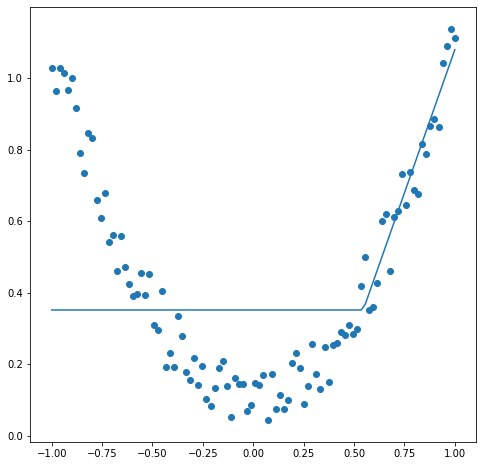

In [26]:
pre = net(x)
pre = pre.data.numpy()
x1 = x.data.numpy() 
plt.figure(1, figsize = (8, 8))
plt.scatter(x.data.numpy(), y.data.numpy()) 
plt.plot(x1, pre) 
